## Задание итоговая работа Математика для Data Science

#### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))
a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y
наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы
это сделаете?

####  Задание 2
Упражнения по вычислению производных (на python и на бумаге)
𝑡𝑔2(𝑠𝑖𝑛(𝑥)+𝑐𝑜𝑠(2𝑥+3))  в точке 𝑥0=1

#### Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите
оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

#### Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50.
Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

#### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)
[1, 4]
[1, 1]

In [165]:
# Подгружаю нужные библиотеки

import numpy as np
import random

from sklearn.decomposition import TruncatedSVD
from sympy import *
import math
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))
a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y
наиболее похожий пользователь на пользователя x).

# Матрицы рейтингов фильмов изначально по условию не было выдано.

# Поэтому создаю эту матрицу сам.

In [10]:
# Создаю матрицу рейтингов фильмов. 10 строк и 15 столбцов
matrix = [[ random.randint(1, 10) for j in range(15)] for i in range(10)]
matrix

[[7, 10, 7, 5, 7, 7, 8, 6, 6, 2, 8, 8, 5, 4, 6],
 [10, 8, 4, 7, 4, 1, 4, 3, 3, 8, 5, 6, 8, 4, 9],
 [6, 4, 4, 1, 1, 5, 6, 8, 2, 8, 2, 10, 1, 3, 10],
 [8, 3, 9, 2, 8, 1, 6, 1, 6, 4, 3, 4, 10, 5, 3],
 [2, 1, 5, 9, 8, 4, 2, 6, 9, 3, 8, 7, 2, 4, 7],
 [3, 1, 10, 4, 6, 6, 5, 7, 5, 4, 6, 8, 4, 9, 4],
 [10, 5, 1, 6, 10, 3, 9, 10, 5, 8, 10, 7, 7, 6, 3],
 [5, 8, 5, 2, 3, 7, 7, 5, 6, 10, 4, 9, 10, 6, 2],
 [9, 7, 10, 3, 8, 3, 10, 1, 7, 4, 2, 1, 5, 10, 7],
 [9, 5, 3, 9, 9, 5, 4, 8, 7, 9, 5, 6, 10, 1, 9]]

In [24]:
print('Ответ:')
for i in range(len(matrix)):
    max_cos = 0
    x = matrix[i]
    for j in range(len(matrix)):
        if i != j:
            y = matrix[j]
            # НайдУ скалярное произведение векторов x и y:
            ScPr = np.dot(x,y)
            
            # 2. НайдУ модули векторов (нормы):
            x_m = np.linalg.norm(x)
            y_m = np.linalg.norm(y)
            
            # Найду cos угла между векторами:
            cos_ugla_xy = ScPr / (x_m * y_m)
            
            # Находим лучший (максимальный)
            if cos_ugla_xy > max_cos:
                max_cos = cos_ugla_xy
                para = j
    print(f'Пара N {(i+1):2.0f}: пользователь: {(i+1):2.0f} и пользователь: {(para+1):2.0f}. Лучший max cos= {max_cos}')

Ответ:
Пара N  1: пользователь:  1 и пользователь:  7. Лучший max cos= 0.8843123947297682
Пара N  2: пользователь:  2 и пользователь: 10. Лучший max cos= 0.9254941612918774
Пара N  3: пользователь:  3 и пользователь:  2. Лучший max cos= 0.8121664513263365
Пара N  4: пользователь:  4 и пользователь:  9. Лучший max cos= 0.9096145078561773
Пара N  5: пользователь:  5 и пользователь:  6. Лучший max cos= 0.874854135633195
Пара N  6: пользователь:  6 и пользователь:  5. Лучший max cos= 0.874854135633195
Пара N  7: пользователь:  7 и пользователь: 10. Лучший max cos= 0.9033442768688449
Пара N  8: пользователь:  8 и пользователь:  1. Лучший max cos= 0.872479391911452
Пара N  9: пользователь:  9 и пользователь:  4. Лучший max cos= 0.9096145078561773
Пара N 10: пользователь: 10 и пользователь:  2. Лучший max cos= 0.9254941612918774


## b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

### Попытаюсь воспользоваться: sklearn.decomposition.TruncatedSVD

In [28]:
trun_svd = TruncatedSVD(n_components = 5)
matrix_transformed = trun_svd .fit_transform(matrix)
matrix_transformed

array([[24.64007615,  0.36600387,  2.01117671,  1.56167039, -0.08842877],
       [22.14682459, -1.05671084, -6.19522835, -2.13872506, -3.86711951],
       [18.55853893, -5.45282167, -2.27515638,  8.39367586, -4.07314093],
       [19.52670719,  7.57251666, -0.92552398, -2.7931776 ,  1.21172179],
       [19.52801492, -4.45591703,  8.84100415, -3.19745521, -2.32419327],
       [20.87026338,  1.28593658,  7.46239723,  4.08164288,  1.44968922],
       [26.28225224, -3.52979742, -0.66776411, -3.5262673 ,  5.69157893],
       [22.99806832,  0.42207631, -4.02377907,  4.95879852,  5.60846603],
       [22.6577758 , 10.80583873,  0.15738387,  0.18315969, -3.5638573 ],
       [25.89477553, -5.17016614, -2.85466201, -5.42990027, -1.65813047]])

In [29]:
# Еще роз найду пары, только уже для сжатой матрицы

print('Ответ 1:')
for i in range(len(matrix_transformed)):
    max_cos = 0
    x = matrix_transformed[i]
    for j in range(len(matrix_transformed)):
        if i != j:
            y = matrix_transformed[j]
            # НайдУ скалярное произведение векторов x и y:
            ScPr = np.dot(x,y)
            
            # 2. НайдУ модули векторов (нормы):
            x_m = np.linalg.norm(x)
            y_m = np.linalg.norm(y)
            
            # Найду cos угла между векторами:
            cos_ugla_xy = ScPr / (x_m * y_m)
            
            # Находим лучший (максимальный)
            if cos_ugla_xy > max_cos:
                max_cos = cos_ugla_xy
                para = j
    print(f'Пара N {(i+1):2.0f}: пользователь: {(i+1):2.0f} и пользователь: {(para+1):2.0f}. Лучший max cos= {max_cos}')

Ответ 1:
Пара N  1: пользователь:  1 и пользователь:  6. Лучший max cos= 0.9564148083764197
Пара N  2: пользователь:  2 и пользователь: 10. Лучший max cos= 0.9654343008049765
Пара N  3: пользователь:  3 и пользователь:  1. Лучший max cos= 0.8676036447797313
Пара N  4: пользователь:  4 и пользователь:  9. Лучший max cos= 0.9667732765219613
Пара N  5: пользователь:  5 и пользователь:  6. Лучший max cos= 0.896911808810147
Пара N  6: пользователь:  6 и пользователь:  1. Лучший max cos= 0.9564148083764197
Пара N  7: пользователь:  7 и пользователь: 10. Лучший max cos= 0.9561093896823329
Пара N  8: пользователь:  8 и пользователь:  1. Лучший max cos= 0.931645976561928
Пара N  9: пользователь:  9 и пользователь:  4. Лучший max cos= 0.9667732765219613
Пара N 10: пользователь: 10 и пользователь:  2. Лучший max cos= 0.9654343008049765


#### Вижу: результат немного изменился

#  Задание 2
Упражнения по вычислению производных (на python и на бумаге)

tan^2(𝑠𝑖𝑛(𝑥)+𝑐𝑜𝑠(2𝑥+3))  в точке 𝑥0=1

# Сперва вычислю ручками (на бумаге) по шагам:

(tg^2(sin(x)+cos(2*x+3)))' = 2tg(cos(2x+3) + sin(x)) * (tg(cos(2x+3) + sin(x)))'

2tg(cos(2x+3) + sin(x)) * (tg(cos(2x+3) + sin(x)))' =
                                                                          1                
                                = 2tg(cos(2x+3) + sin(x)) *   ---------------------------- * (cos(2x+3) + sin(x))'
                                                                cos^2 (cos(2x+3) + sin(x))

In [ ]:
 2tg(cos(2x+3) + sin(x))                                   2tg(cos(2x+3) + sin(x))
---------------------------- * (cos(2x+3) + sin(x))' =   ---------------------------- * ((cos(2x+3))' + (sin(x))')
cos^2 (cos(2x+3) + sin(x))                                cos^2 (cos(2x+3) + sin(x))

In [ ]:
2tg(cos(2x+3) + sin(x))                                      2tg(cos(2x+3) + sin(x))
---------------------------- * ((cos(2x+3))' + (sin(x))') = ---------------------------- * (-sin(2x+3) * (2x+3)' + cos(x))
cos^2 (cos(2x+3) + sin(x))                                   cos^2 (cos(2x+3) + sin(x))

In [ ]:
 2tg(cos(2x+3) + sin(x))                                     2tg(cos(2x+3) + sin(x))
----------------------------*(-sin(2x+3)*(2x+3)' + cos(x)) = --------------------------*(-sin(2x+3) * (2*(x)' + (3)') + cos(x))
cos^2 (cos(2x+3) + sin(x))                                   cos^2 (cos(2x+3) + sin(x))

In [ ]:
2tg(cos(2x+3) + sin(x))                                         2tg(cos(2x+3) + sin(x))
--------------------------*(-sin(2x+3)*(2*(x)'+(3)')+cos(x)) = ---------------------------*(-sin(2x+3) * (2*1+0) + cos(x))
cos^2 (cos(2x+3) + sin(x))                                      cos^2 (cos(2x+3) + sin(x))

In [ ]:
Результат
    
 2*(cos(x)-2*sin(2*x+3))*tan(cos(2*x+3)+sin(x))
------------------------------------------------
            cos^2 (cos(2x+3) + sin(x))
              

In [ ]:
в точке 𝑥0=1:

2*(cos(1)-2*sin(2*1+3))*tan(cos(2*1+3)+sin(1))    2*(0.54-2*(-0.96)) * tan(0.28+0.84)    2 * 2,46 * 2.06     10.14
---------------------------------------------- = ------------------------------------- = --------------- = --------- = 53.4
      cos(cos(2*1+3) + sin(1))^2                          cos(0,28 + 0,84)^2                   0,19           0,19

# Результат чуток отличается за счет грубого огругления ручками.

## Результат отличается за счет грубого огругления ручками.

In [124]:
# Проверю результат:

rez1 = 2*(math.cos(1)-2*math.sin(2*1+3))*math.tan(math.cos(2*1+3)+math.sin(1)) / math.cos(math.cos(2*1+3)+math.sin(1))**2
rez1

55.38591763533786

### Ответы сошлись!

### Теперь вычислю с помощью Python:

In [49]:
x = symbols('x')
pr1 = diff( tan( sin(x)+cos(2*x+3) )**2 )
pr1

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [50]:
f1 = lambdify(x, pr1)
print(f'Производная = {f1(1)}')

Производная = 55.385917635337854


### Результаты сошлись...

# Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите
оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [160]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [161]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])
x

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [163]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])
fx

array([  0.        , -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092])

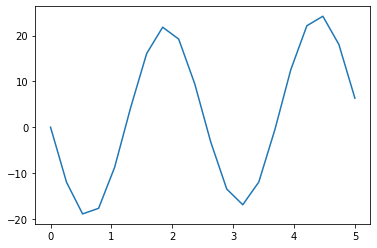

In [164]:
plt.plot(x, fx)
plt.show()

In [166]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [181]:
bounds = [(-20, 20), (-20, 20)]
result = differential_evolution(error, bounds, seed = 42)
print(result)

     fun: 1.5125979224706043e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])


In [179]:
print(f'Параметр a = {round(result.x[0],1)}')
print(f'Параметр b = {round(result.x[1],1)}')

Параметр a = 3.0
Параметр b = -2.5


# Задание 4

Создайте собственную дискретную случайную величину с 20 значениями.
Сгенерируйте 1000 выборок размера 50.
Посчитайте среднее для каждой выборки.
Постройте гистограмму распределения средних.

In [144]:
zn = np.random.randint(1, 101, size = 20)
zn

array([74, 72, 44, 63, 31, 25, 21,  5,  4, 42, 41, 98, 15, 88, 31, 45, 89,
       65, 25, 23])

In [145]:
print(zn)

[74 72 44 63 31 25 21  5  4 42 41 98 15 88 31 45 89 65 25 23]


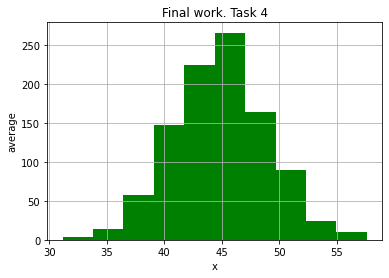

In [159]:
sredn = []
for i in range(1000):
    a = np.random.choice(zn, size=50)
    # print(a)
    sredn.append(np.mean(a))
    
plt.hist(sredn, color='g')
plt.title('Final work. Task 4')
plt.grid()
plt.xlabel('x')
plt.ylabel('average')
plt.show()

# Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[1, 4]

[1, 1]

In [135]:
# Создаю матрицу

matr = np.array([[1, 4],
                [1, 1]])
print(matr)

[[1 4]
 [1 1]]


# Расчет на бумаге:


1. Собственны значения:
|1-λ 4| = 0
|1 1-λ|

Через определитель матрицы:

(1- λ)*(1- λ) - (1*4) = 0 => λ**2-2λ-3 = 0

λ1 = 3; λ2 = -1


2. Для каждого λ найду собственные вектора:

а) λ1 = 3
-2x + 4y = 0
  x - 2y = 0

Ответ = |2|
        |1|


Проверить можно так:

|1 4| * |2| = |2+4| = |6| = 3 * |2|
|1 1|   |1|   |2+1|   |3|       |1|
получил тот же вектор

-----------------------------------

б) λ2 = -1
2x + 4y = 0
 x + 2y = 0

Ответ = |-2|
        | 1|


Проверка:

|1 4| * |-2| = |-2+4| = | 2|
|1 1|   | 1|   |-2+1|   |-1|

In [140]:
# Расчет на Python:

sobs_zn, sobs_vekt = np.linalg.eig(matr)
print(f'Собственные значения: n{sobs_zn}')
print(f'Собственные  вектора: \n{sobs_vekt}')

Собственные значения: n[ 3. -1.]
Собственные  вектора: 
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


In [141]:
# Собственные значения можно и так:
np.linalg.eigvals(matr)

array([ 3., -1.])